In [ ]:
%pip install langchain langchain_core langchain_openai langchain-community

In [3]:
# OpenAI Key : 환경변수 로드 
from dotenv import load_dotenv
load_dotenv()

True

# Model
- LLM과 Chat Model 클래스로, 2종류의 언어 모델이 있음
- 각각의 클래스는 입출력이 다르기 때문에 사용자의 요구사항에 맞게 선택하면 됨
- 일반적으로 LLM은 한 번 요청 받아서 복잡한 출력을 생성하는데 적합
    - 문서 요약, 콘텐츠 생성, 질문에 대한 답변 생성 등 복잡한 자연어 처리 작업을 수행
- Chat Model은 사용자와의 상호작용을 위한 모델로, 연속적인 대화를 관리하는데 더 적합
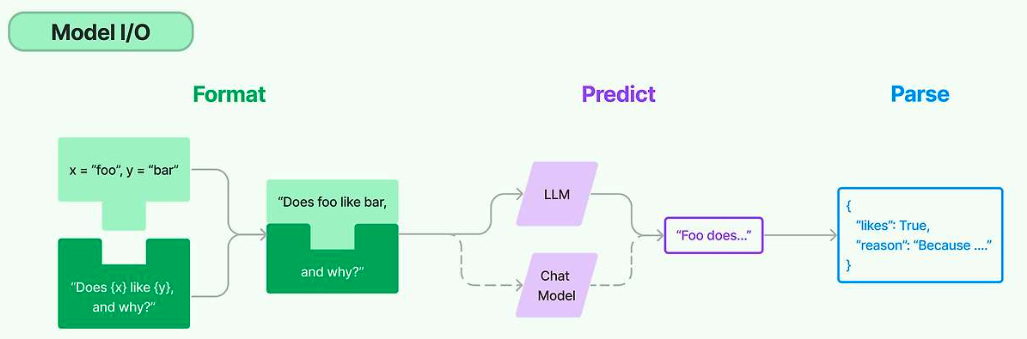

## Langchian에서 LLM 호출하기
- 문자열 입력을 받아서 문자열 출력을 반환하는 가장 간단한 형태
- 복잡한 API 변환 작업 없이 여러 LLM 모델을 쉽게 호출할 수 있음
- 랭체인은 OpenAI의 GPT 시리즈, Cohere의 LLM, Hugging Face의 Transformer 모델 등 다양한 LLM 제공 업체와의 통합을 지원
- 이를 통해, 사용자는 쉽게 다양한 LLM 모델을 사용할 수 있음

In [5]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

llm.invoke("안녕하세요, 랭체인에 대해 설명해주세요.")

AIMessage(content='안녕하세요! 랭체인(Chain of Thought)이라는 개념은 주로 인공지능 및 자연어 처리(NLP) 분야에서 사용됩니다. 특히, 대형 언어 모델(LLM)과 관련하여 모델이 문제 해결 과정에서 더 나은 성능을 발휘하도록 돕는 방법론 중 하나입니다.\n\n랭체인은 모델이 문제를 해결할 때, 그 과정에서의 사고 과정을 단계적으로 나타내도록 하는 방식입니다. 예를 들어, 수학 문제를 푸는 경우, 모델이 답을 찾기 위해 어떤 규칙이나 절차를 따르는지를 설명하도록 유도합니다. 이렇게 하면 모델이 더 명확하고 일관된 답변을 생성할 수 있습니다.\n\n이 방법은 특히 복잡한 문제를 다룰 때 유용하며, 모델이 단순히 정답을 출력하는 것이 아니라 그 과정을 설명하게 함으로써, 더욱 신뢰할 수 있는 결과를 도출할 수 있게 합니다.\n\n랭체인은 또한 인간의 사고 과정을 모방하려는 시도로 볼 수 있으며, 이러한 접근은 AI의 투명성과 해석 가능성을 높이는 데 기여할 수 있습니다. 이러한 방식은 AI의 의사결정 과정을 이해하고 개선하는 데 도움을 줄 수 있습니다.\n\n혹시 랭체인에 대해 더 궁금한 점이 있으시면 말씀해 주세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 290, 'prompt_tokens': 19, 'total_tokens': 309, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f59a81427f', 'finish_reason': 'stop', 'logprobs': None

## Langchian에서 Chat Model 호출하기
- 시스템 메시지, 휴먼 메시지 등, 메시지 객체의 리스트를 입력으로 받고, 하나의 메시지를 반환
- 대화형 상황에 최적화되어 있어, 연속적인 대화의 맥락을 유지하면서 적절한 응답을 생성하는데 사용됨

- `대화형 입력과 출력`
    - 대화의 연속성을 고려해서 입력된 메시지 리스트를 처리하고, 적절한 응답을 생성
    - 챗봇, 가상 비서, 고객 지원 시스템 등 대화 기반 서비스에 적합
- `다양한 작동 모드 지원`
    - 랭체인은 동기(sync), 비동기(async), 배치(batching), 스트리밍(streaming) 모드에서 모델을 사용할 수 있는 기능을 제공
    - 다양한 애플리케이션 요구사항과 트래픽 패턴에 따라 유연한 대응이 가능

In [6]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

# 모델 생성
chat_model = ChatOpenAI(model="gpt-4o-mini")

# 프롬프트 템플릿 생성
chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "당신은 친절한 선생님입니다."),
    ("user", "{user_input}")
])

chat_prompt

ChatPromptTemplate(input_variables=['user_input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='당신은 친절한 영어선생님입니다.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['user_input'], input_types={}, partial_variables={}, template='{user_input}'), additional_kwargs={})])

In [8]:
chat_prompt.input_variables

['user_input']

In [11]:
# 체인 생성 = 프롬프트 + 모델
chain = chat_prompt | chat_model
chain

ChatPromptTemplate(input_variables=['user_input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='당신은 친절한 영어선생님입니다.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['user_input'], input_types={}, partial_variables={}, template='{user_input}'), additional_kwargs={})])
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x115ab32f0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x115a83380>, root_client=<openai.OpenAI object at 0x115ab27e0>, root_async_client=<openai.AsyncOpenAI object at 0x115ab12b0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [12]:
response = chain.invoke({"user_input": "안녕하세요? 한국의 대표적인 관광지 3군데를 추천해주세요."})
response

AIMessage(content='안녕하세요! 한국의 대표적인 관광지 세 곳을 추천해드릴게요.\n\n1. **서울 경복궁**: 경복궁은 한국의 전통 궁궐로, 조선 왕조의 주거지였습니다. 아름다운 건축물과 정원이 있으며, 매일 열리는 수문장 교대식도 볼 수 있습니다. 주변에는 국립민속박물관과 북촌 한옥마을도 있어 함께 방문하기 좋습니다.\n\n2. **부산 해운대**: 해운대는 부산에서 가장 유명한 해변으로, 여름철에 많은 관광객이 찾는 곳입니다. 해운대 해수욕장에서 즐거운 수영을 하거나, 주변의 맛집에서 신선한 해산물을 맛볼 수 있습니다. 또한, 가까운 동백섬과 APEC 나루공원도 아름다운 경치를 제공합니다.\n\n3. **경주**: 경주는 신라의 천년 고도로, 많은 역사적 유적지가 있습니다. 불국사와 석굴암은 유네스코 세계문화유산으로 등록되어 있으며, 경주 역사 유적지 지구에서 고대 한국의 문화를 느낄 수 있습니다. 또한, 경주에서는 다양한 고분과 박물관을 방문할 수 있습니다.\n\n이 세 곳은 각각의 매력이 있어 꼭 한 번 방문해보시길 추천합니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 297, 'prompt_tokens': 40, 'total_tokens': 337, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f59a81427f', 'finish_reason': 'stop', 'logprobs': None}, id='run-053cc027-086d-4a45-8b44-e84bfef442cc-0', 

In [13]:
print(response.content)

안녕하세요! 한국의 대표적인 관광지 세 곳을 추천해드릴게요.

1. **서울 경복궁**: 경복궁은 한국의 전통 궁궐로, 조선 왕조의 주거지였습니다. 아름다운 건축물과 정원이 있으며, 매일 열리는 수문장 교대식도 볼 수 있습니다. 주변에는 국립민속박물관과 북촌 한옥마을도 있어 함께 방문하기 좋습니다.

2. **부산 해운대**: 해운대는 부산에서 가장 유명한 해변으로, 여름철에 많은 관광객이 찾는 곳입니다. 해운대 해수욕장에서 즐거운 수영을 하거나, 주변의 맛집에서 신선한 해산물을 맛볼 수 있습니다. 또한, 가까운 동백섬과 APEC 나루공원도 아름다운 경치를 제공합니다.

3. **경주**: 경주는 신라의 천년 고도로, 많은 역사적 유적지가 있습니다. 불국사와 석굴암은 유네스코 세계문화유산으로 등록되어 있으며, 경주 역사 유적지 지구에서 고대 한국의 문화를 느낄 수 있습니다. 또한, 경주에서는 다양한 고분과 박물관을 방문할 수 있습니다.

이 세 곳은 각각의 매력이 있어 꼭 한 번 방문해보시길 추천합니다!


# LLM 파라미터 설정
- Temperature
    - 생성된 텍스트의 다양성을 조정합니다. 값이 작으면 예측 가능하고 일관된 출력을 생성하는 반면, 값이 크면 다양하고 예측하기 어려운 출력을 생성합니다.
- Max Tokens (최대 토큰 수)
    - 생성할 최대 토큰 수를 지정합니다. 생성할 텍스트의 길이를 제한합니다.
- Top P (Top Probability)
    - 생성 과정에서 특정 확률 분포 내에서 상위 P% 토큰만을 고려하는 방식입니다. 이는 출력의 다양성을 조정하는 데 도움이 됩니다.
- Frequency Penalty (빈도 패널티)
    - 값이 클수록 이미 등장한 단어나 구절이 다시 등장할 확률을 감소시킵니다. 이를 통해 반복을 줄이고 텍스트의 다양성을 증가시킬 수 있습니다. (0~1)
- Presence Penalty (존재 패널티)
    - 텍스트 내에서 단어의 존재 유무에 따라 그 단어의 선택 확률을 조정합니다. 값이 클수록 아직 텍스트에 등장하지 않은 새로운 단어의 사용이 장려됩니다. (0~1)
- Stop Sequences (정지 시퀀스)
    - 특정 단어나 구절이 등장할 경우 생성을 멈추도록 설정합니다. 이는 출력을 특정 포인트에서 종료하고자 할 때 사용됩니다.

In [19]:
from langchain_openai import ChatOpenAI

# 모델 파라미터 설정
params = {
    "temperature": 0.7,         # 생성된 텍스트의 다양성 조정
    "max_tokens": 100,          # 생성할 최대 토큰 수
    "frequency_penalty": 0.5,   # 이미 등장한 단어의 재등장 확률
    "presence_penalty": 0.5,    # 새로운 단어의 도입을 장려
    "stop": ["\n"]              # 정지 시퀀스 설정 (해보기 : "stop": [""])
}

# 모델 생성
chat_model = ChatOpenAI(model="gpt-4o-mini", **params)

# 모델 호출
response = chat_model.invoke("싫어하는 음식이 뭐야?")
response.content

'저는 감정을 느끼거나 음식을 먹지 않기 때문에 싫어하는 음식이 없습니다. 하지만 사람마다 싫어하는 음식은 다를 수 있어요. 어떤 특정한 음식에 대해 궁금하신 점이 있으신가요?'

## bind 메소드 : 모델에 적용한 파라미터를 대뜸 바꿀 수 있음!!
- 모델 인스턴스에 파라미터를 추가로 제공하거나 일부 파라미터를 다르게 적용 가능
- 코드의 가독성과 재사용성 높일 수 있음

In [21]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 천문학 질문에 답변할 수 있습니다."),
    ("user", "{user_input}"),
])

messages = prompt.format_messages(user_input="태양계에서 가장 큰 행성은 무엇인가요?")

model = ChatOpenAI(model="gpt-4o-mini", max_tokens=100)

before_answer = model.invoke(messages)

# binding 이전 출력
before_answer.content

'태양계에서 가장 큰 행성은 목성(Jupiter)입니다. 목성은 지름이 약 142,984킬로미터에 달하며, 질량은 지구의 약 318배에 해당합니다. 목성은 가스로 이루어진 거대 행성으로, 강력한 자기장과 많은 위성을 가지고 있습니다.'

In [22]:
# 모델 호출 시 추가적인 인수를 전달하기 위해 bind 메서드 사용 (응답의 최대 길이를 10 토큰으로 제한)
chain = prompt | model.bind(max_tokens=10)

after_answer = chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

# binding 이후 출력
print(after_answer.content)

태양계에서 가장 큰 행성은 목


## 돈돈돈 : 특명 돈을 확인하라! 
### 토큰 사용량 확인
- 특정 호출에 대한 토큰 사용량을 추적
- 현재 OpenAI API 에만 구현되어 있음

In [27]:
from langchain.callbacks import get_openai_callback
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")

with get_openai_callback() as cb:
    response = model.invoke("대한민국의 수도는?")
    print(response.content)
    print(cb)

대한민국의 수도는 서울입니다.
Tokens Used: 21
	Prompt Tokens: 13
	Completion Tokens: 8
Successful Requests: 1
Total Cost (USD): $6.75e-06


In [28]:
with get_openai_callback() as cb:
    response = model.invoke("대한민국의 수도는?")
    print(response.content)
    print(f"총 사용된 토큰수: \t\t{cb.total_tokens}")
    print(f"프롬프트에 사용된 토큰수: \t{cb.prompt_tokens}")
    print(f"답변에 사용된 토큰수: \t{cb.completion_tokens}")
    print(f"호출에 청구된 금액(USD): \t${cb.total_cost}")

대한민국의 수도는 서울입니다.
총 사용된 토큰수: 		21
프롬프트에 사용된 토큰수: 	13
답변에 사용된 토큰수: 	8
호출에 청구된 금액(USD): 	$6.75e-06


### 돈돈돈 & 스피드 : 캐싱
- 동일한 완료를 여러번 요청하는 경우, LLM 공급자에 대한 API 호출 횟수를 줄여 비용 절감 & 애플리케이션 속도 높임

In [30]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

# 모델을 생성합니다.
llm = ChatOpenAI(model="gpt-4o-mini")

# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template("{country}에 대해 200자 내외로 요약해줘")

# 체인을 생성합니다.
chain = prompt | llm

# 캐싱 전
with get_openai_callback() as cb:
    %time response = chain.invoke({"country": "대한민국"})
    print(response.content)
    print("*"*10)
    print(f"총 사용된 토큰수: \t\t{cb.total_tokens}")
    print(f"프롬프트에 사용된 토큰수: \t{cb.prompt_tokens}")
    print(f"답변에 사용된 토큰수: \t{cb.completion_tokens}")
    print(f"호출에 청구된 금액(USD): \t${cb.total_cost}")

CPU times: user 5.84 ms, sys: 709 μs, total: 6.54 ms
Wall time: 1.92 s
대한민국은 동아시아에 위치한 국가로, 한반도의 남부에 있습니다. 서울이 수도이며, 경제적으로는 세계 10위권에 드는 강국입니다. K-팝, 한국 음식, 한류 문화가 세계적으로 인기를 끌고 있으며, IT와 기술 분야에서도 선두주자입니다. 역사적으로는 분단과 전쟁을 겪었으나, 현재는 민주주의와 경제 발전을 이루고 있습니다.
**********
총 사용된 토큰수: 		120
프롬프트에 사용된 토큰수: 	21
답변에 사용된 토큰수: 	99
호출에 청구된 금액(USD): 	$6.255e-05


### InMemoryCache

In [31]:
from langchain.globals import set_llm_cache
from langchain.cache import InMemoryCache

# 인메모리 캐시를 사용합니다.
set_llm_cache(InMemoryCache())

# 메모리에 저장
with get_openai_callback() as cb:
    %time response = chain.invoke({"country": "대한민국"})
    print(response.content)
    print("*"*10)
    print(f"총 사용된 토큰수: \t\t{cb.total_tokens}")
    print(f"프롬프트에 사용된 토큰수: \t{cb.prompt_tokens}")
    print(f"답변에 사용된 토큰수: \t{cb.completion_tokens}")
    print(f"호출에 청구된 금액(USD): \t${cb.total_cost}")

CPU times: user 6.36 ms, sys: 363 μs, total: 6.73 ms
Wall time: 1.75 s
대한민국은 동아시아에 위치한 국가로, 한반도의 남부에 있습니다. 서울은 수도이며, 경제, 문화, 기술 분야에서 빠르게 발전해왔습니다. K-드라마와 K-팝 등으로 글로벌 영향력을 확대하고 있으며, 민주주의와 교육 수준이 높습니다. 전통과 현대가 조화를 이루는 사회로, 맛있는 음식과 아름다운 자연 경관도 유명합니다.
**********
총 사용된 토큰수: 		112
프롬프트에 사용된 토큰수: 	21
답변에 사용된 토큰수: 	91
호출에 청구된 금액(USD): 	$5.7749999999999994e-05


In [32]:
# 속도 빨라지고, 추가 비용 X : get_openai_callback() 내부의 비용 및 토큰 사용량 출력은 캐시가 적용되지 않은 첫 번째 호출에만 반영
with get_openai_callback() as cb:
    %time response = chain.invoke({"country": "대한민국"})
    print(response.content)
    print("*"*10)
    print(f"총 사용된 토큰수: \t\t{cb.total_tokens}")
    print(f"프롬프트에 사용된 토큰수: \t{cb.prompt_tokens}")
    print(f"답변에 사용된 토큰수: \t{cb.completion_tokens}")
    print(f"호출에 청구된 금액(USD): \t${cb.total_cost}")

CPU times: user 657 μs, sys: 83 μs, total: 740 μs
Wall time: 771 μs
대한민국은 동아시아에 위치한 국가로, 한반도의 남부에 있습니다. 서울은 수도이며, 경제, 문화, 기술 분야에서 빠르게 발전해왔습니다. K-드라마와 K-팝 등으로 글로벌 영향력을 확대하고 있으며, 민주주의와 교육 수준이 높습니다. 전통과 현대가 조화를 이루는 사회로, 맛있는 음식과 아름다운 자연 경관도 유명합니다.
**********
총 사용된 토큰수: 		112
프롬프트에 사용된 토큰수: 	21
답변에 사용된 토큰수: 	91
호출에 청구된 금액(USD): 	$5.7749999999999994e-05


## SQLite Cache

In [ ]:
from langchain.cache import SQLiteCache
from langchain.globals import set_llm_cache

set_llm_cache(SQLiteCache(database_path="my_llm_cache.db"))

